## Importing

The data set is too large do __NOT__ push it to online repository. 

1. Download kaggle dataset from: https://www.kaggle.com/datasets/maxhorowitz/nflplaybyplay2009to2016?select=NFL+Play+by+Play+2009-2018+%28v5%29.csv
2. Manually add it to the repository in dataset folder, and change the name to: 'nfl_playbyplay_dataset_2009_2018.csv.
3. Run this notebook file to perform data preprocessing.

In [20]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Load dataset
print('Loading CSV (this may take a while for large files)...')
df = pd.read_csv("../dataset/nfl_playbyplay_dataset_2009_2018.csv", low_memory=False, index_col=0)
print("Shape of original dataset: ", df.shape)

Loading CSV (this may take a while for large files)...
Shape of original dataset:  (449371, 254)


## Explore Dataset:

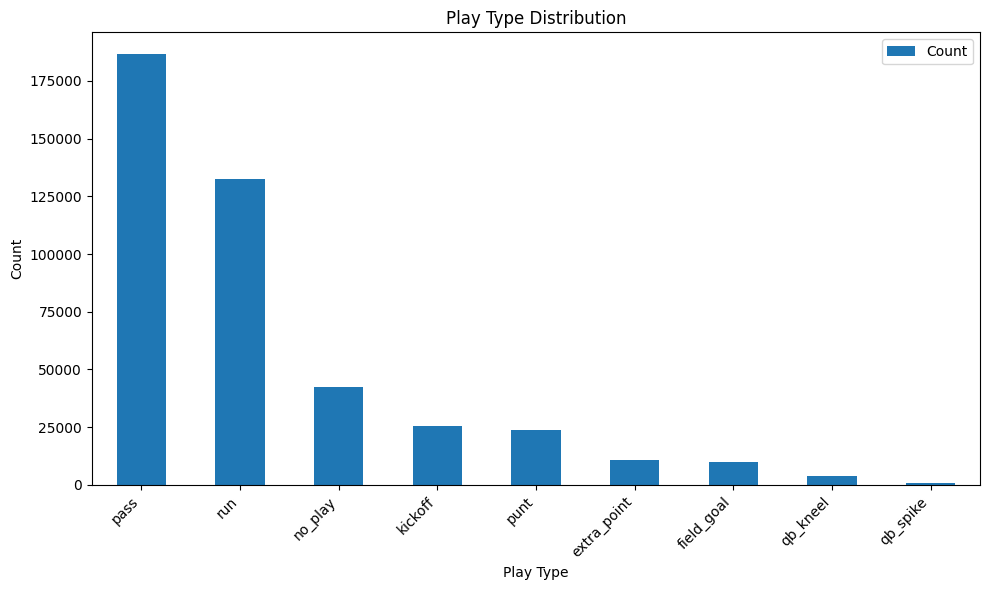

In [23]:
# Get distribution of play types
play_dist = df['play_type'].value_counts()

# Create count dataframe
dist_df = pd.DataFrame({
    'Count': play_dist,
}).sort_values('Count', ascending=False)

# Display a bar chart of the play type distribution
plt.figure(figsize=(10, 6))
dist_df.plot(kind='bar', ax=plt.gca())
plt.title('Play Type Distribution')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [24]:
# Display all columns
for col in df.columns:
    print(col)

game_id
home_team
away_team
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_home_pass_epa
total_away_pass_epa
air_e

## Removing irrelevant features

__Removing__
- Metadata
- Player/team names 
- Post play_type data

nfl_relevant_cols = dataset - irrelevent features

In [25]:
relevant_cols = [
    # Team information
    "posteam", "defteam", "posteam_type",
    # Game information
    "yardline_100", "qtr", "down", "ydstogo", "goal_to_go", "score_differential", "game_half", "drive",
    "posteam_timeouts_remaining", "defteam_timeouts_remaining",
    # Formation information
    "shotgun", "no_huddle",
    # Time remaining
    "quarter_seconds_remaining", "half_seconds_remaining", "game_seconds_remaining",
    # Field position
    "side_of_field", "play_type"
]

nfl_relevant_cols = df[relevant_cols].copy()

In [26]:
nfl_relevant_cols.head()

,posteam,defteam,posteam_type,yardline_100,qtr,down,ydstogo,goal_to_go,score_differential,game_half,drive,posteam_timeouts_remaining,defteam_timeouts_remaining,shotgun,no_huddle,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,side_of_field,play_type
play_id,,,,,,,,,,,,,,,,,,,,
46,PIT,TEN,home,30.0,1,NaN,0,0.0,NaN,Half1,1,3.0,3.0,0,0,900.0,1800.0,3600.0,TEN,kickoff
68,PIT,TEN,home,58.0,1,1.0,10,0.0,0.0,Half1,1,3.0,3.0,0,0,893.0,1793.0,3593.0,PIT,pass
92,PIT,TEN,home,53.0,1,2.0,5,0.0,0.0,Half1,1,3.0,3.0,0,0,856.0,1756.0,3556.0,PIT,run
113,PIT,TEN,home,56.0,1,3.0,8,0.0,0.0,Half1,1,3.0,3.0,1,0,815.0,1715.0,3515.0,PIT,pass
139,PIT,TEN,home,56.0,1,4.0,8,0.0,0.0,Half1,1,3.0,3.0,0,0,807.0,1707.0,3507.0,PIT,punt


## Play type filtering - Removing irrelevant dataset entries

__Removing__:
- no_play
- kickoff
- punt
- NaN
- extra_point
- field_goal
- qb_kneel
- qb_spike

nfl_filtered = nfl_relevant_cols - irrelevent play types

In [27]:
relevant_play_types = ["run", "pass"]
nfl_filtered = nfl_relevant_cols[nfl_relevant_cols["play_type"].isin(relevant_play_types)].copy()
nfl_filtered.shape

(319369, 20)

## Removing rows with null values

In [28]:
nfl_filtered = nfl_filtered.dropna()
print("Shape of filtered dataset: ", nfl_filtered.shape)

Shape of filtered dataset:  (318668, 20)


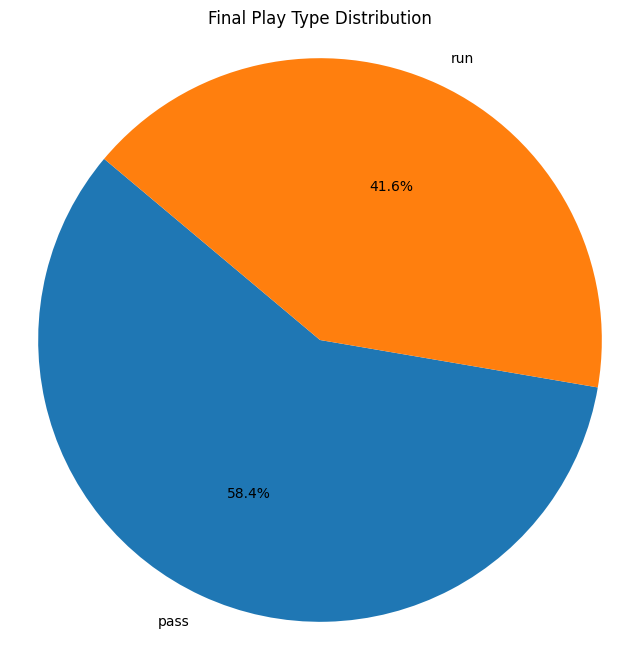

In [31]:
# Get distribution of play types
play_dist_pct = nfl_filtered['play_type'].value_counts(normalize=True) * 100

# Create percentage dataframe
dist_df = pd.DataFrame({
    'Percentage': play_dist_pct.round(2)
}).sort_values('Percentage', ascending=False)

# Display a pie chart showing the final play type distribution
plt.figure(figsize=(8, 8))
plt.pie(play_dist, labels=play_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Final Play Type Distribution')
plt.axis('equal')
plt.show()

## Save filtered dataset to new csv file

In [32]:
print('Saving CSV (this may take a while for large files)...')
nfl_filtered.to_csv("../dataset/nfl_filtered.csv", index=True)

Saving CSV (this may take a while for large files)...
